# Question no 1 (Glass)

In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
len(df)

214

In [4]:
df.drop('Fe',axis=1,inplace=True)

In [5]:
df.replace({0:np.NaN},inplace=True)

In [6]:
df.isna().sum()

RI        0
Na        0
Mg       42
Al        0
Si        0
K        30
Ca        0
Ba      176
Type      0
dtype: int64

In [7]:
mean1=df['Mg'].mean()
mean2=df['Ba'].mean()
mean3=df['K'].mean()

In [8]:
df['Mg'].replace({np.NaN:mean1},inplace=True)
df['Ba'].replace({np.NaN:mean2},inplace=True)
df['K'].replace({np.NaN:mean3},inplace=True)

In [9]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Type
0,1.52101,13.64,4.490000,1.10,71.78,0.060000,8.75,0.985789,1
1,1.51761,13.89,3.600000,1.36,72.73,0.480000,7.83,0.985789,1
2,1.51618,13.53,3.550000,1.54,72.99,0.390000,7.78,0.985789,1
3,1.51766,13.21,3.690000,1.29,72.61,0.570000,8.22,0.985789,1
4,1.51742,13.27,3.620000,1.24,73.08,0.550000,8.07,0.985789,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,3.340058,2.88,72.61,0.080000,9.18,1.060000,7
210,1.51685,14.92,3.340058,1.99,73.06,0.578098,8.40,1.590000,7
211,1.52065,14.36,3.340058,2.02,73.42,0.578098,8.44,1.640000,7
212,1.51651,14.38,3.340058,1.94,73.61,0.578098,8.48,1.570000,7


In [10]:
df.eq(0).any().any()

False

In [11]:

X=df.iloc[:,0:-1]
Y=df['Type']

In [12]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba
0,1.52101,13.64,4.490000,1.10,71.78,0.060000,8.75,0.985789
1,1.51761,13.89,3.600000,1.36,72.73,0.480000,7.83,0.985789
2,1.51618,13.53,3.550000,1.54,72.99,0.390000,7.78,0.985789
3,1.51766,13.21,3.690000,1.29,72.61,0.570000,8.22,0.985789
4,1.51742,13.27,3.620000,1.24,73.08,0.550000,8.07,0.985789
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,3.340058,2.88,72.61,0.080000,9.18,1.060000
210,1.51685,14.92,3.340058,1.99,73.06,0.578098,8.40,1.590000
211,1.52065,14.36,3.340058,2.02,73.42,0.578098,8.44,1.640000
212,1.51651,14.38,3.340058,1.94,73.61,0.578098,8.48,1.570000


In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [31]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [32]:
#num_folds = 10
#kfold = KFold(n_splits=30)

In [33]:
model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model, X, Y, cv=kfold)

In [34]:
print(results.mean())

0.5678571428571428


## Grid search CV

In [35]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [37]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [38]:
print(grid.best_score_)
print(grid.best_params_)

0.6171650055370985
{'n_neighbors': 8}


## Grid Search for Algorithm Tuning

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [19]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [20]:
print(grid.best_score_)
print(grid.best_params_)

0.6171650055370985
{'n_neighbors': 8}


### Visualizing the CV results

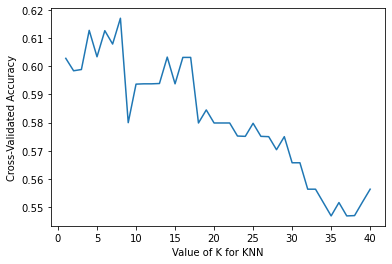

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()